In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_1_.8_.7_.7_.6',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_1_.8_.7_.7_.6',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

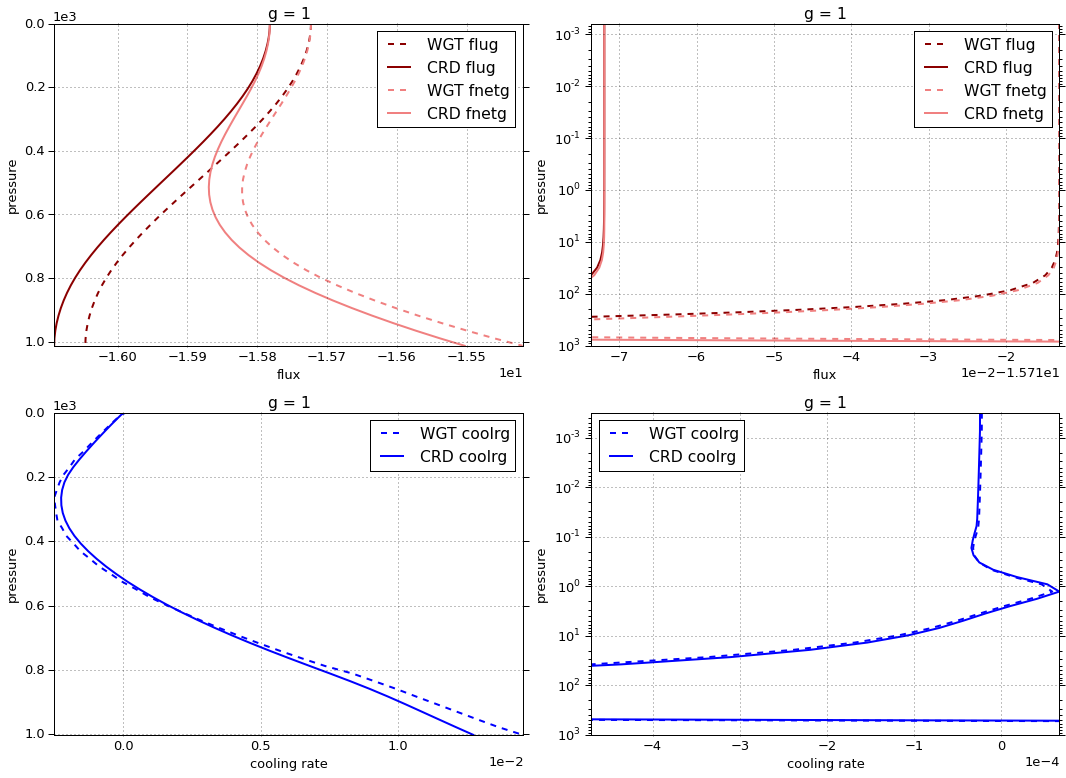

# Figure: flux, cooling rate. g-group 2

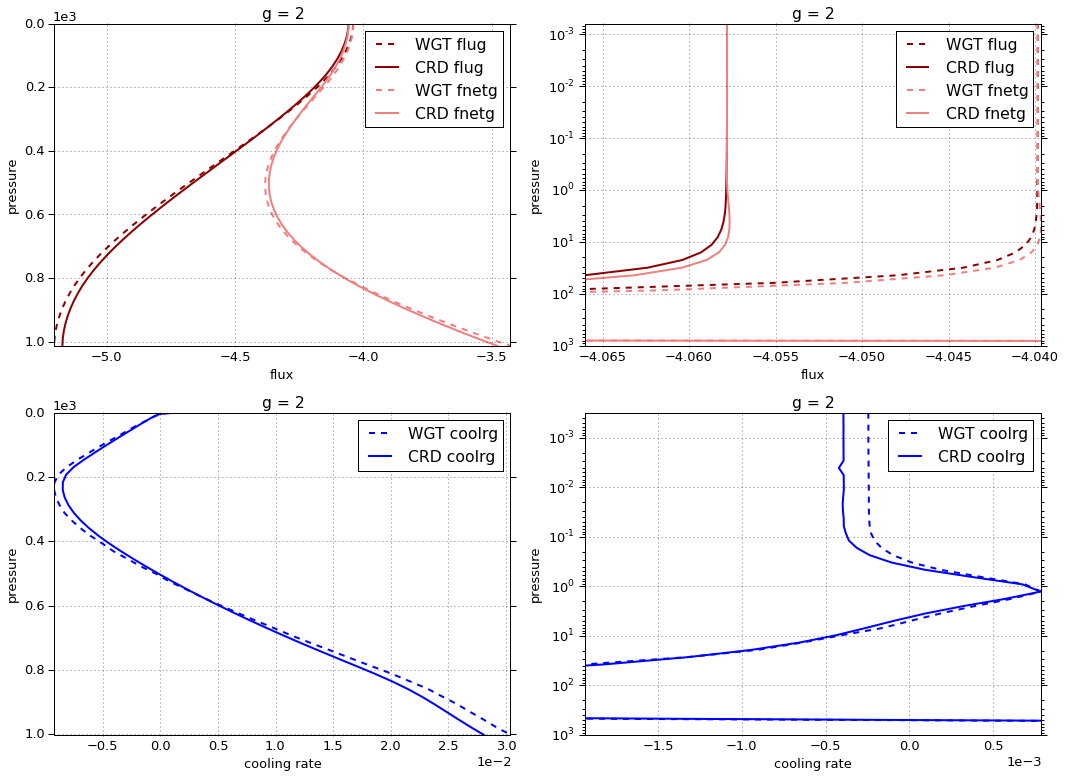

# Figure: flux, cooling rate. g-group 3

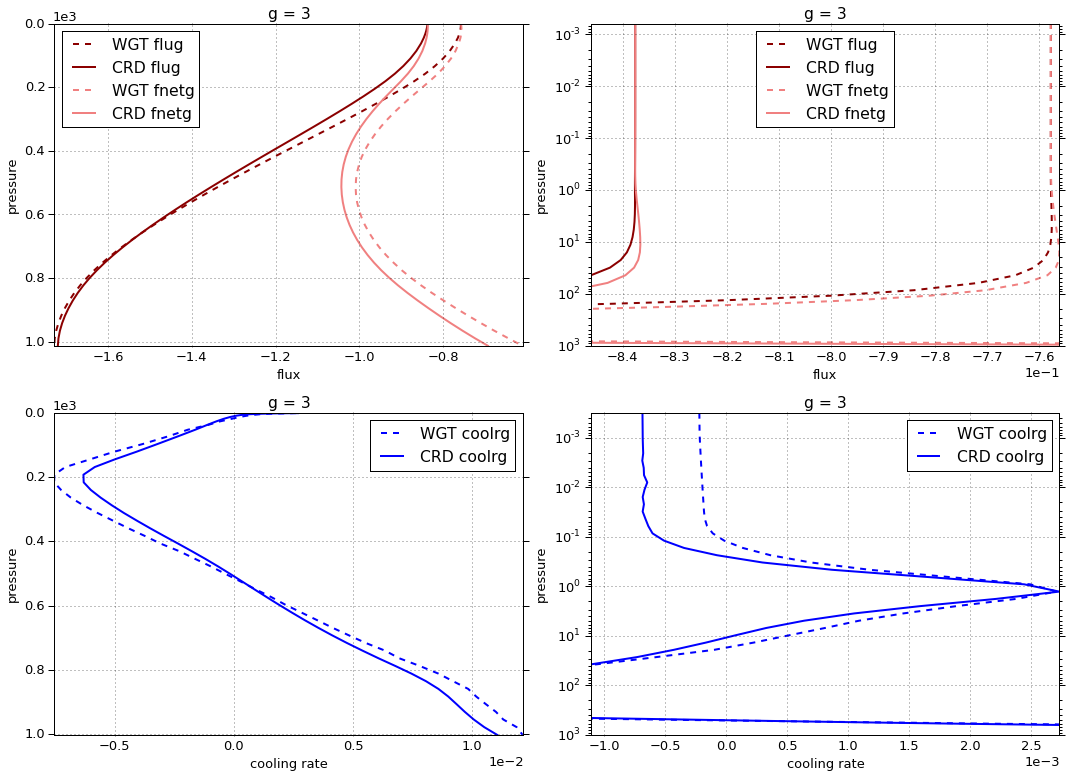

# Figure: flux, cooling rate. g-group 4

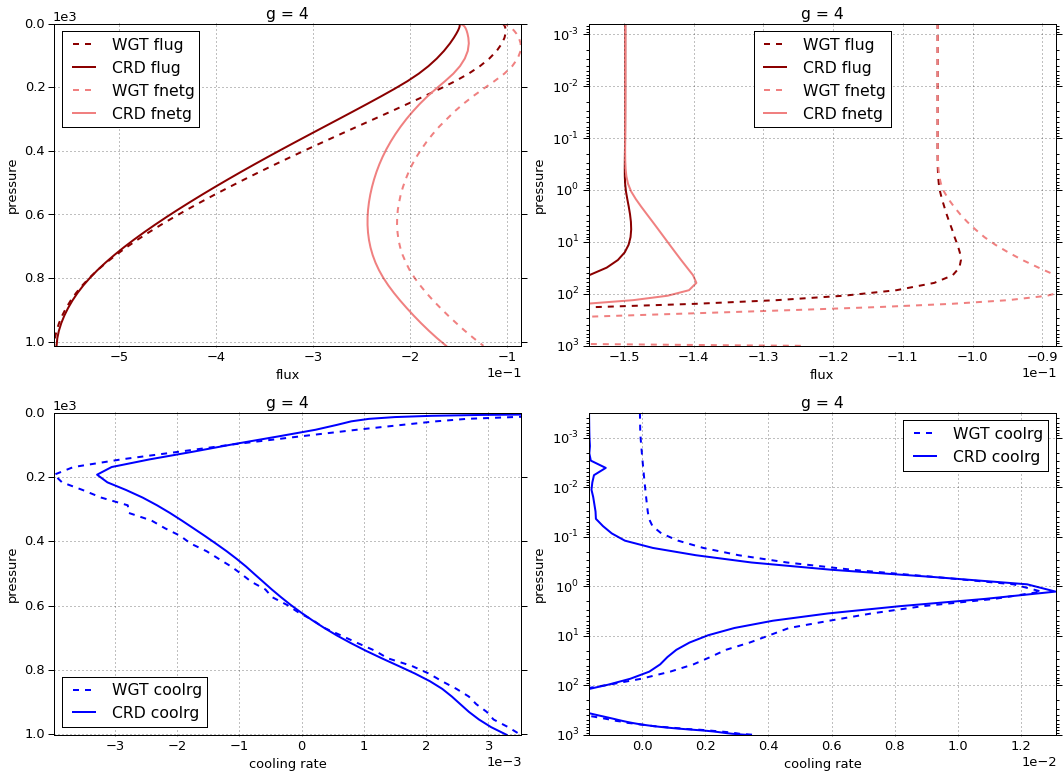

# Figure: flux, cooling rate. g-group 5

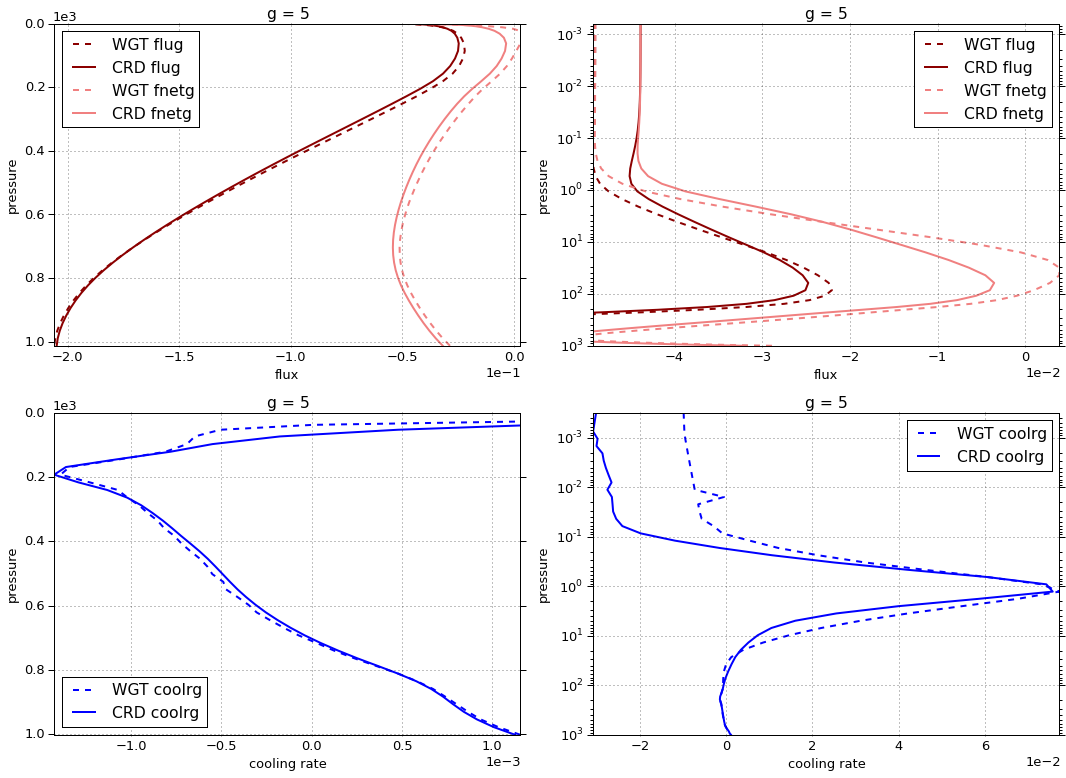

# Figure: flux, cooling rate. g-group total

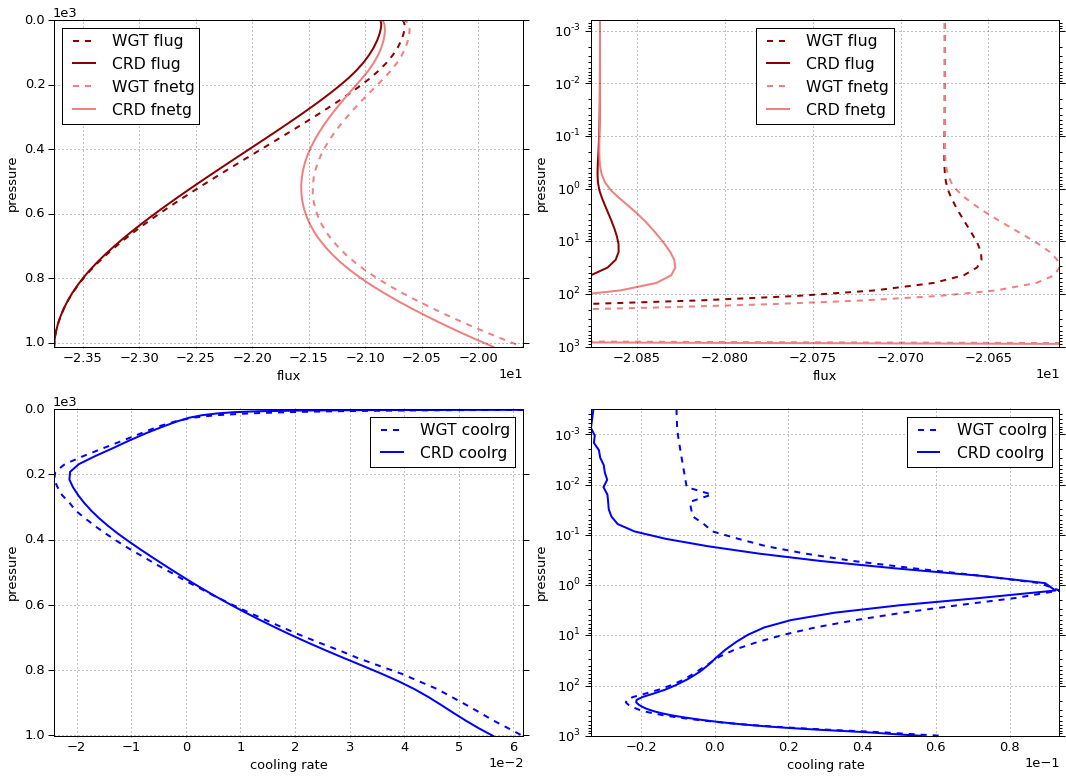

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.057822  0.000000  -4.057822
  1013     76     -5.174101  1.696558  -3.477544
3 0        1      -0.837654  0.000000  -0.837654
  1013     76     -1.720822  1.027999  -0.692824
4 0        1      -0.149837  0.000000  -0.149837
  1013     76     -0.564452  0.401463  -0.162989
5 0        1      -0.043910  0.000000  -0.043910
  1013     76     -0.204857  0.172943  -0.031914


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.723096  0.000000 -15.723096
  1013     76    -16.046320  0.626262 -15.420058
2 0        1      -4.039861  0.000000  -4.039861
  1013     76     -5.206227  1.780075  -3.426152
3 0        1      -0.757802  0.000000  -0.757802
  1013     76     -1.729673  1.119496  -0.610177
4 0        1      -0.105011  0.000000  -0.105011
  1013     76     -0.566958  0.442379  -0.124579
5 0        1      -0.049096  0.000000  -0.049096
  1013     76     -0.205993  0.177297  -0.028696


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.058867  0.000000  0.058867
  1013     76     0.044618  0.038234  0.082852
2 0        1      0.017962  0.000000  0.017962
  1013     76    -0.032126  0.083517  0.051392
3 0        1      0.079852  0.000000  0.079852
  1013     76    -0.008851  0.091497  0.082647
4 0        1      0.044826  0.000000  0.044826
  1013     76    -0.002506  0.040915  0.038409
5 0        1     -0.005186  0.000000 -0.005186
  1013     76    -0.001136  0.004354  0.003218

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000393
  1001.112500 75     0.028060
3 0.000312    1     -0.000688
  1001.112500 75     0.011055
4 0.000312    1     -0.001683
  1001.112500 75     0.003296
5 0.000312    1     -0.030129
  1001.112500 75     0.001127


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000022
  1001.112500 75     0.014516
2 0.000312    1     -0.000244
  1001.112500 75     0.030381
3 0.000312    1     -0.000222
  1001.112500 75     0.012126
4 0.000312    1     -0.000071
  1001.112500 75     0.003522
5 0.000312    1     -0.009831
  1001.112500 75     0.001156


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000002
  1001.112500 75     0.001795
2 0.000312    1      0.000149
  1001.112500 75     0.002322
3 0.000312    1      0.000467
  1001.112500 75     0.001071
4 0.000312    1      0.001612
  1001.112500 75     0.000226
5 0.000312    1      0.020298
  1001.112500 75     0.000029

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871187,0.00000,-20.871187
1013,76,-23.755171,3.88699,-19.868180



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.674866,0.000000,-20.674866
1013,76,-23.755171,4.145508,-19.609662



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.196321,0.000000,0.196321
1013,76,0.000000,0.258518,0.258518


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032917
1001.112500,75,0.056259



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.010390
1001.112500,75,0.061701



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.022528
1001.112500,75,0.005442


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686000,0.675487
2,0.211758,0.219162
3,0.070636,0.072812
4,0.023212,0.023867
5,0.008394,0.008671


In [16]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -15.723096  0.000000e+00 -15.723096   1     1   
0.000624      1     2 -15.723096  1.663600e-10 -15.723096   1     2   
0.000876      1     3 -15.723096  2.347033e-10 -15.723096   1     3   
0.001229      1     4 -15.723096  3.335259e-10 -15.723096   1     4   
0.001723      1     5 -15.723096  4.773609e-10 -15.723096   1     5   
0.002417      1     6 -15.723096  6.867619e-10 -15.723096   1     6   
0.003391      1     7 -15.723096  9.916824e-10 -15.723096   1     7   
0.004757      1     8 -15.723096  1.435775e-09 -15.723096   1     8   
0.006672      1     9 -15.723096  2.082661e-09 -15.723096   1     9   
0.009359      1    10 -15.723096  3.025267e-09 -15.723096   1    10   
0.013128      1    11 -15.723096  4.399365e-09 -15.723096   1    11   
0.018415      1    12 -15.723096  6.403737e-09 -15.723096   1    12   
0.025830      1    13 -15.723096  9.329973e-09 -15.723096   1    13   
0.036232      1    14 -15.723097  1.360852e-08 -15.723097   1    14   
0.050823      1    15 -15.723097  1.994618e-08 -15.723097   1    15   
0.071291      1    16 -15.723097  3.013075e-08 -15.723097   1    16   
0.100000      1    17 -15.723097  4.947789e-08 -15.723097   1    17   
0.140271      1    18 -15.723097  9.087220e-08 -15.723097   1    18   
0.196760      1    19 -15.723097  1.815661e-07 -15.723097   1    19   
0.275997      1    20 -15.723098  3.805326e-07 -15.723097   1    20   
0.387100      1    21 -15.723099  8.164491e-07 -15.723098   1    21   
0.543100      1    22 -15.723100  1.770270e-06 -15.723098   1    22   
0.761700      1    23 -15.723101  3.821715e-06 -15.723098   1    23   
1.068500      1    24 -15.723104  7.820596e-06 -15.723096   1    24   
1.498800      1    25 -15.723107  1.400284e-05 -15.723093   1    25   
2.102400      1    26 -15.723112  2.145846e-05 -15.723091   1    26   
2.949000      1    27 -15.723120  3.003334e-05 -15.723090   1    27   
4.136600      1    28 -15.723134  4.011827e-05 -15.723094   1    28   
5.802500      1    29 -15.723156  5.260685e-05 -15.723104   1    29   
8.139200      1    30 -15.723195  6.907544e-05 -15.723126   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -15.802251  1.580354e-02 -15.786448   1    47   
347.300000    1    48 -15.813045  1.988383e-02 -15.793161   1    48   
371.075000    1    49 -15.824120  2.472933e-02 -15.799391   1    49   
394.850000    1    50 -15.835606  3.040956e-02 -15.805197   1    50   
418.625000    1    51 -15.847248  3.698918e-02 -15.810259   1    51   
442.400000    1    52 -15.859155  4.453009e-02 -15.814625   1    52   
466.175000    1    53 -15.871093  5.308955e-02 -15.818003   1    53   
489.950000    1    54 -15.883169  6.272049e-02 -15.820448   1    54   
513.725000    1    55 -15.895154  7.347342e-02 -15.821681   1    55   
537.500000    1    56 -15.907160  8.539830e-02 -15.821761   1    56   
561.275000    1    57 -15.918947  9.854512e-02 -15.820402   1    57   
585.050000    1    58 -15.930642  1.129636e-01 -15.817679   1    58   
608.825000    1    59 -15.942036  1.287026e-01 -15.813333   1    59   
632.600000    1    60 -15.953071  1.458099e-01 -15.807261   1    60   
656.375000    1    61 -15.963727  1.643316e-01 -15.799396   1    61   
680.150000    1    62 -15.973935  1.843090e-01 -15.789626   1    62   
703.925000    1    63 -15.983635  2.057538e-01 -15.777881   1    63   
727.700000    1    64 -15.992770  2.287150e-01 -15.764055   1    64   
751.475000    1    65 -16.001275  2.532213e-01 -15.748054   1    65   
775.250000    1    66 -16.009094  2.793253e-01 -15.729769   1    66   
799.025000    1    67 -16.016177  3.070598e-01 -15.709117   1    67   
822.800000    1    68 -16.022492  3.368708e-01 -15.685621   1    68   
846.575000    1    69 -16.028031  3.

In [17]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -4.039861  0.000000e+00 -4.039861   2     1 -4.057822   
0.000624      2     2 -4.039861  2.820293e-09 -4.039861   2     2 -4.057822   
0.000876      2     3 -4.039861  3.974458e-09 -4.039861   2     3 -4.057822   
0.001229      2     4 -4.039861  5.629998e-09 -4.039861   2     4 -4.057822   
0.001723      2     5 -4.039861  8.019060e-09 -4.039861   2     5 -4.057822   
0.002417      2     6 -4.039861  1.146730e-08 -4.039861   2     6 -4.057822   
0.003391      2     7 -4.039861  1.644512e-08 -4.039861   2     7 -4.057822   
0.004757      2     8 -4.039861  2.363175e-08 -4.039861   2     8 -4.057823   
0.006672      2     9 -4.039861  3.400775e-08 -4.039861   2     9 -4.057823   
0.009359      2    10 -4.039861  4.899130e-08 -4.039861   2    10 -4.057823   
0.013128      2    11 -4.039861  7.063280e-08 -4.039861   2    11 -4.057823   
0.018415      2    12 -4.039862  1.019006e-07 -4.039861   2    12 -4.057823   
0.025830      2    13 -4.039862  1.470957e-07 -4.039862   2    13 -4.057824   
0.036232      2    14 -4.039862  2.124804e-07 -4.039862   2    14 -4.057824   
0.050823      2    15 -4.039863  3.081806e-07 -4.039862   2    15 -4.057825   
0.071291      2    16 -4.039863  4.574360e-07 -4.039863   2    16 -4.057826   
0.100000      2    17 -4.039864  7.210024e-07 -4.039864   2    17 -4.057828   
0.140271      2    18 -4.039866  1.231239e-06 -4.039865   2    18 -4.057830   
0.196760      2    19 -4.039868  2.242201e-06 -4.039866   2    19 -4.057834   
0.275997      2    20 -4.039871  4.251606e-06 -4.039867   2    20 -4.057838   
0.387100      2    21 -4.039875  8.249328e-06 -4.039867   2    21 -4.057845   
0.543100      2    22 -4.039879  1.621340e-05 -4.039863   2    22 -4.057853   
0.761700      2    23 -4.039884  3.185990e-05 -4.039852   2    23 -4.057863   
1.068500      2    24 -4.039887  6.026664e-05 -4.039827   2    24 -4.057873   
1.498800      2    25 -4.039890  1.034853e-04 -4.039786   2    25 -4.057886   
2.102400      2    26 -4.039900  1.570692e-04 -4.039743   2    26 -4.057909   
2.949000      2    27 -4.039925  2.205465e-04 -4.039704   2    27 -4.057952   
4.136600      2    28 -4.039974  2.964950e-04 -4.039677   2    28 -4.058027   
5.802500      2    29 -4.040066  3.906805e-04 -4.039675   2    29 -4.058152   
8.139200      2    30 -4.040233  5.132646e-04 -4.039720   2    30 -4.058360   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.369945  8.430705e-02 -4.285638   2    47 -4.369618   
347.300000    2    48 -4.410583  1.033124e-01 -4.307271   2    48 -4.408024   
371.075000    2    49 -4.451963  1.251803e-01 -4.326782   2    49 -4.447167   
394.850000    2    50 -4.493808  1.499828e-01 -4.343825   2    50 -4.486830   
418.625000    2    51 -4.535908  1.779025e-01 -4.358006   2    51 -4.526790   
442.400000    2    52 -4.578085  2.085913e-01 -4.369493   2    52 -4.566858   
466.175000    2    53 -4.620147  2.425841e-01 -4.377563   2    53 -4.606871   
489.950000    2    54 -4.661993  2.796887e-01 -4.382305   2    54 -4.646673   
513.725000    2    55 -4.703356  3.201423e-01 -4.383214   2    55 -4.686122   
537.500000    2    56 -4.744128  3.633012e-01 -4.380827   2    56 -4.725073   
561.275000    2    57 -4.784183  4.096782e-01 -4.374505   2    57 -4.763374   
585.050000    2    58 -4.823308  4.589891e-01 -4.364319   2    58 -4.800869   
608.825000    2    59 -4.861331  5.113004e-01 -4.350031   2    59 -4.837399   
632.600000    2    60 -4.898101  5.666438e-01 -4.331457   2    60 -4.872804   
656.375000    2    61 -4.933446  6.249557e-01 -4.308490   2    61 -4.906916   
680.150000    2    62 -4.967216  6.862646e-01 -4.280952   2    62 -4.939564   
703.925000    2    63 -4.999196  7.502200e-01 -4.248976   2   

In [18]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.757802  0.000000e+00 -0.757802   3     1 -0.837654   
0.000624      3     2 -0.757802  6.779248e-09 -0.757802   3     2 -0.837654   
0.000876      3     3 -0.757802  9.553919e-09 -0.757802   3     3 -0.837654   
0.001229      3     4 -0.757802  1.353444e-08 -0.757802   3     4 -0.837654   
0.001723      3     5 -0.757802  1.927920e-08 -0.757802   3     5 -0.837654   
0.002417      3     6 -0.757802  2.757175e-08 -0.757802   3     6 -0.837654   
0.003391      3     7 -0.757802  3.954399e-08 -0.757802   3     7 -0.837654   
0.004757      3     8 -0.757802  5.683061e-08 -0.757802   3     8 -0.837654   
0.006672      3     9 -0.757802  8.179185e-08 -0.757802   3     9 -0.837655   
0.009359      3    10 -0.757802  1.178419e-07 -0.757802   3    10 -0.837655   
0.013128      3    11 -0.757802  1.699183e-07 -0.757802   3    11 -0.837655   
0.018415      3    12 -0.757802  2.451708e-07 -0.757802   3    12 -0.837656   
0.025830      3    13 -0.757803  3.539616e-07 -0.757802   3    13 -0.837657   
0.036232      3    14 -0.757803  5.113845e-07 -0.757803   3    14 -0.837658   
0.050823      3    15 -0.757804  7.418516e-07 -0.757803   3    15 -0.837659   
0.071291      3    16 -0.757804  1.101353e-06 -0.757803   3    16 -0.837661   
0.100000      3    17 -0.757805  1.735811e-06 -0.757804   3    17 -0.837664   
0.140271      3    18 -0.757807  2.960810e-06 -0.757804   3    18 -0.837668   
0.196760      3    19 -0.757808  5.375757e-06 -0.757803   3    19 -0.837674   
0.275997      3    20 -0.757810  1.013929e-05 -0.757799   3    20 -0.837682   
0.387100      3    21 -0.757810  1.951979e-05 -0.757790   3    21 -0.837691   
0.543100      3    22 -0.757807  3.797117e-05 -0.757769   3    22 -0.837700   
0.761700      3    23 -0.757795  7.369013e-05 -0.757721   3    23 -0.837706   
1.068500      3    24 -0.757768  1.377665e-04 -0.757631   3    24 -0.837704   
1.498800      3    25 -0.757728  2.355507e-04 -0.757492   3    25 -0.837695   
2.102400      3    26 -0.757681  3.587975e-04 -0.757322   3    26 -0.837696   
2.949000      3    27 -0.757641  5.074004e-04 -0.757133   3    27 -0.837723   
4.136600      3    28 -0.757617  6.877550e-04 -0.756929   3    28 -0.837793   
5.802500      3    29 -0.757627  9.134168e-04 -0.756714   3    29 -0.837930   
8.139200      3    30 -0.757698  1.207838e-03 -0.756490   3    30 -0.838168   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -1.063362  1.149722e-01 -0.948389   3    47 -1.108617   
347.300000    3    48 -1.098329  1.356288e-01 -0.962700   3    48 -1.139586   
371.075000    3    49 -1.133466  1.582729e-01 -0.975193   3    49 -1.170758   
394.850000    3    50 -1.168592  1.828526e-01 -0.985739   3    50 -1.201982   
418.625000    3    51 -1.203634  2.092133e-01 -0.994421   3    51 -1.233101   
442.400000    3    52 -1.238074  2.372014e-01 -1.000872   3    52 -1.263999   
466.175000    3    53 -1.272173  2.667101e-01 -1.005463   3    53 -1.294588   
489.950000    3    54 -1.305725  2.975625e-01 -1.008162   3    54 -1.324789   
513.725000    3    55 -1.338679  3.295789e-01 -1.009100   3    55 -1.354540   
537.500000    3    56 -1.370931  3.626998e-01 -1.008232   3    56 -1.383770   
561.275000    3    57 -1.402407  3.967786e-01 -1.005629   3    57 -1.412407   
585.050000    3    58 -1.433018  4.318189e-01 -1.001199   3    58 -1.440364   
608.825000    3    59 -1.462651  4.675484e-01 -0.995103   3    59 -1.467550   
632.600000    3    60 -1.491202  5.040562e-01 -0.987146   3    60 -1.493871   
656.375000    3    61 -1.518577  5.412544e-01 -0.977322   3    61 -1.519226   
680.150000    3    62 -1.544658  5.789916e-01 -0.965666   3    62 -1.543505   
703.925000    3    63 -1.569333  6.172794e-01 -0.952054   3   

In [19]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.105011  0.000000e+00 -0.105011   4     1 -0.149837   
0.000624      4     2 -0.105011  3.000634e-08 -0.105011   4     2 -0.149837   
0.000876      4     3 -0.105011  4.229616e-08 -0.105011   4     3 -0.149837   
0.001229      4     4 -0.105011  5.996075e-08 -0.105011   4     4 -0.149837   
0.001723      4     5 -0.105011  8.549844e-08 -0.105011   4     5 -0.149838   
0.002417      4     6 -0.105011  1.224227e-07 -0.105011   4     6 -0.149838   
0.003391      4     7 -0.105011  1.758152e-07 -0.105011   4     7 -0.149838   
0.004757      4     8 -0.105011  2.530225e-07 -0.105011   4     8 -0.149838   
0.006672      4     9 -0.105012  3.646612e-07 -0.105011   4     9 -0.149839   
0.009359      4    10 -0.105012  5.260989e-07 -0.105011   4    10 -0.149840   
0.013128      4    11 -0.105012  7.595671e-07 -0.105011   4    11 -0.149841   
0.018415      4    12 -0.105012  1.097258e-06 -0.105011   4    12 -0.149842   
0.025830      4    13 -0.105012  1.585804e-06 -0.105011   4    13 -0.149844   
0.036232      4    14 -0.105013  2.293047e-06 -0.105011   4    14 -0.149847   
0.050823      4    15 -0.105014  3.328574e-06 -0.105010   4    15 -0.149851   
0.071291      4    16 -0.105014  4.946635e-06 -0.105009   4    16 -0.149856   
0.100000      4    17 -0.105015  7.813615e-06 -0.105007   4    17 -0.149863   
0.140271      4    18 -0.105015  1.334641e-05 -0.105002   4    18 -0.149874   
0.196760      4    19 -0.105013  2.416191e-05 -0.104989   4    19 -0.149887   
0.275997      4    20 -0.105005  4.515491e-05 -0.104960   4    20 -0.149899   
0.387100      4    21 -0.104985  8.554512e-05 -0.104900   4    21 -0.149909   
0.543100      4    22 -0.104940  1.626556e-04 -0.104777   4    22 -0.149903   
0.761700      4    23 -0.104843  3.066771e-04 -0.104536   4    23 -0.149856   
1.068500      4    24 -0.104664  5.560335e-04 -0.104108   4    24 -0.149739   
1.498800      4    25 -0.104392  9.289299e-04 -0.103464   4    25 -0.149547   
2.102400      4    26 -0.104059  1.393892e-03 -0.102666   4    26 -0.149339   
2.949000      4    27 -0.103718  1.943653e-03 -0.101775   4    27 -0.149155   
4.136600      4    28 -0.103340  2.587748e-03 -0.100752   4    28 -0.149026   
5.802500      4    29 -0.102933  3.351791e-03 -0.099581   4    29 -0.148988   
8.139200      4    30 -0.102572  4.279681e-03 -0.098293   4    30 -0.149080   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.254580  8.451015e-02 -0.170070   4    47 -0.288262   
347.300000    4    48 -0.271819  9.495835e-02 -0.176861   4    48 -0.302981   
371.075000    4    49 -0.288995  1.059461e-01 -0.183049   4    49 -0.317628   
394.850000    4    50 -0.306017  1.174776e-01 -0.188539   4    50 -0.332144   
418.625000    4    51 -0.322713  1.291498e-01 -0.193564   4    51 -0.346478   
442.400000    4    52 -0.339170  1.413033e-01 -0.197867   4    52 -0.360584   
466.175000    4    53 -0.355325  1.537061e-01 -0.201619   4    53 -0.374441   
489.950000    4    54 -0.371041  1.662328e-01 -0.204808   4    54 -0.388032   
513.725000    4    55 -0.386404  1.788786e-01 -0.207526   4    55 -0.401351   
537.500000    4    56 -0.401457  1.916580e-01 -0.209799   4    56 -0.414384   
561.275000    4    57 -0.415979  2.045404e-01 -0.211438   4    57 -0.427113   
585.050000    4    58 -0.430108  2.173315e-01 -0.212777   4    58 -0.439514   
608.825000    4    59 -0.443758  2.303095e-01 -0.213449   4    59 -0.451554   
632.600000    4    60 -0.456902  2.433130e-01 -0.213589   4    60 -0.463201   
656.375000    4    61 -0.469481  2.563927e-01 -0.213088   4    61 -0.474419   
680.150000    4    62 -0.481456  2.693739e-01 -0.212083   4    62 -0.485167   
703.925000    4    63 -0.492786  2.824802e-01 -0.210306   4   

In [20]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.049096  0.000000e+00 -0.049096   5     1 -0.043910   
0.000624      5     2 -0.049097  4.795497e-07 -0.049097   5     2 -0.043914   
0.000876      5     3 -0.049098  6.752350e-07 -0.049097   5     3 -0.043915   
0.001229      5     4 -0.049099  9.545210e-07 -0.049098   5     4 -0.043916   
0.001723      5     5 -0.049100  1.355104e-06 -0.049098   5     5 -0.043919   
0.002417      5     6 -0.049101  1.929713e-06 -0.049099   5     6 -0.043922   
0.003391      5     7 -0.049103  2.753996e-06 -0.049100   5     7 -0.043927   
0.004757      5     8 -0.049105  3.936406e-06 -0.049101   5     8 -0.043933   
0.006672      5     9 -0.049109  5.632332e-06 -0.049103   5     9 -0.043942   
0.009359      5    10 -0.049114  8.064721e-06 -0.049105   5    10 -0.043955   
0.013128      5    11 -0.049120  1.155312e-05 -0.049109   5    11 -0.043973   
0.018415      5    12 -0.049126  1.655573e-05 -0.049109   5    12 -0.043998   
0.025830      5    13 -0.049138  2.372916e-05 -0.049115   5    13 -0.044033   
0.036232      5    14 -0.049156  3.401750e-05 -0.049122   5    14 -0.044082   
0.050823      5    15 -0.049181  4.892572e-05 -0.049132   5    15 -0.044150   
0.071291      5    16 -0.049211  7.160095e-05 -0.049139   5    16 -0.044244   
0.100000      5    17 -0.049251  1.091580e-04 -0.049142   5    17 -0.044369   
0.140271      5    18 -0.049291  1.751771e-04 -0.049116   5    18 -0.044527   
0.196760      5    19 -0.049327  2.925400e-04 -0.049035   5    19 -0.044713   
0.275997      5    20 -0.049334  4.996874e-04 -0.048835   5    20 -0.044916   
0.387100      5    21 -0.049272  8.619451e-04 -0.048410   5    21 -0.045097   
0.543100      5    22 -0.049048  1.489919e-03 -0.047558   5    22 -0.045169   
0.761700      5    23 -0.048540  2.550822e-03 -0.045989   5    23 -0.044966   
1.068500      5    24 -0.047571  4.243130e-03 -0.043328   5    24 -0.044282   
1.498800      5    25 -0.046049  6.660854e-03 -0.039388   5    25 -0.042997   
2.102400      5    26 -0.044170  9.616100e-03 -0.034554   5    26 -0.041395   
2.949000      5    27 -0.042029  1.296384e-02 -0.029065   5    27 -0.039621   
4.136600      5    28 -0.039709  1.657967e-02 -0.023130   5    28 -0.037758   
5.802500      5    29 -0.037255  2.029411e-02 -0.016961   5    29 -0.035839   
8.139200      5    30 -0.034712  2.386434e-02 -0.010848   5    30 -0.033868   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.070752  4.221075e-02 -0.028542   5    47 -0.074702   
347.300000    5    48 -0.077676  4.672685e-02 -0.030949   5    48 -0.081400   
371.075000    5    49 -0.084618  5.136740e-02 -0.033251   5    49 -0.088099   
394.850000    5    50 -0.091504  5.610841e-02 -0.035396   5    50 -0.094749   
418.625000    5    51 -0.098345  6.091767e-02 -0.037427   5    51 -0.101326   
442.400000    5    52 -0.105088  6.576747e-02 -0.039321   5    52 -0.107810   
466.175000    5    53 -0.111722  7.065960e-02 -0.041062   5    53 -0.114190   
489.950000    5    54 -0.118247  7.555569e-02 -0.042691   5    54 -0.120457   
513.725000    5    55 -0.124677  8.043510e-02 -0.044242   5    55 -0.126609   
537.500000    5    56 -0.130954  8.533112e-02 -0.045622   5    56 -0.132645   
561.275000    5    57 -0.137161  9.020244e-02 -0.046958   5    57 -0.138558   
585.050000    5    58 -0.143188  9.507311e-02 -0.048115   5    58 -0.144341   
608.825000    5    59 -0.149074  9.996978e-02 -0.049104   5    59 -0.149976   
632.600000    5    60 -0.154807  1.048436e-01 -0.049963   5    60 -0.155453   
656.375000    5    61 -0.160335  1.097173e-01 -0.050618   5    61 -0.160750   
680.150000    5    62 -0.165656  1.146002e-01 -0.051056   5    62 -0.165851   
703.925000    5    63 -0.170746  1.194850e-01 -0.051261   5   

In [21]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')